 <img src="./markdown/reco.jpg" alt="Recommendation system" style="display: block;
  margin-left: auto;
  margin-right: auto;
  width: 80%;height:350px"> 

<h1 style="text-align:center;font-size:35px;">Recipe recommendation system</h1>
<br>

<h1 style="font-size:30px;color:#008abc;">Introduction</h1>

#### The goal of this project is to ultimately create a personalized recipe recommendation system that learns from the choice of its users. 
##### Data source and fields explanation:https://data.world/atlas-query/cookbook


##### Due to feasibility limitations, the recommender system will not be able to track users` preferences so that we will come up with a new goal.

## Healthy recommender system 
##### This system will keep track of the ingredients from each recipe, also will keep track of the important and needed intake of nutrients for a healthy nutrition.
<br>

### Import required Libraries.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load data

In [15]:
df_nutrients_for_health = pd.read_csv('./exports/nutrients_for_health.csv')
df_ingredients = pd.read_csv('./data/ingredient.csv')
df_recipe_recommender = pd.read_csv('./exports/recipe_recommender.csv')

<br>
<br>
</br>
<h1 style="font-size:30px;color:#008abc;">Exploratory Data Analysis (EDA)</h1> 
<br>

## Our scope in this unit is to get more insights about the data that we have.
#### By keeping in mind our goal, healthy recommender system, we have to focus on the features of the data that can make a recipe to be considered healthy. 
#### We have to find more insights about the nutrients and also about the categories of the most used ingredients.
<br>

In [16]:
df_nutrients_for_health.describe()

,recipe_id,protein,carbo,total_fat,cholestrl,sodium,calories
count,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000,878.000000
mean,780.146925,12.203189,26.963132,6.579032,36.166344,341.498519,217.914465
std,316.651890,14.060335,20.391097,7.209403,57.638835,588.022379,149.079768
min,214.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,541.250000,2.030000,10.602500,0.772500,0.000000,39.822500,103.820000
50%,762.500000,5.885000,24.340000,4.705000,6.530000,198.895000,190.160000
75%,1054.750000,20.075000,38.045000,9.785000,56.877500,470.672500,310.505000
max,1436.000000,105.650000,116.780000,53.230000,443.040000,12092.600000,892.040000


In [17]:
df_nutrients_for_health = df_nutrients_for_health.drop(['recipe_id'], axis=1)

#### From the above table we can see the exact statistics of the nutrients from all the recipes. We can notice that for all nutrients, the mean is higher than the median so we expect a right skewness in all distributions.
#### Let`s further visualize all the above mentioned numbers.

Graph for protein/serving


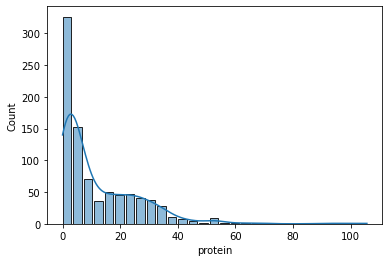

Graph for carbo/serving


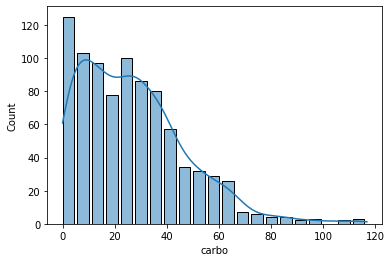

Graph for total_fat/serving


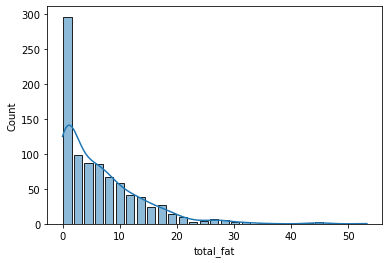

Graph for cholestrl/serving


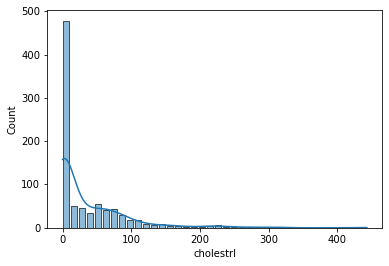

Graph for sodium/serving


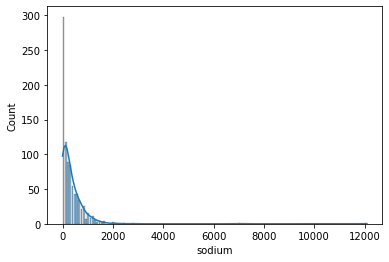

Graph for calories/serving


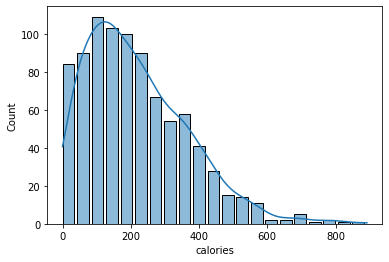

In [18]:
for i in df_nutrients_for_health.columns:
    print("Graph for %s/serving" % (i))
    sns.histplot(x=df_nutrients_for_health[i], kde=True, shrink=.8)
    plt.show()

#### We can notice that all the distributions are right skewed. 
##### This means, that the majority of the recipe`s nutrients situates in a smaller range 0-n(depending on the nutrient) and there are some outlier recipes which increase the mean and also IQR (Q3-Q1) of each nutrient. We use IQR in this situation, instead of STD, because the distributions are far away from normality.
<br>


### Let`s check if there are any correlations between the nutrients

<AxesSubplot:>

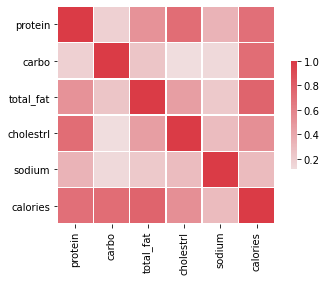

In [19]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df_nutrients_for_health.corr(), vmax=1, center=0, cmap=cmap,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

### As we can visualize there are some correlations between the nutrients.
Calories are correlated with:
<ul>
    <li>proteins</li>
    <li>carbohydrates</li>    
    <li>total fat</li>
    Less with: <ul><li>cholesterol</li></ul>
</ul>
Sodium is not correlated with any of these.<br>
Proteins are correlated with:
<ul>
    <li>total fat</li>
    <li>cholesterol</li>
</ul>
Cholesterol is also correlated with: -> total fat

<br>
<br>

### Let`s check the top 20 categories of ingredients from our data set.

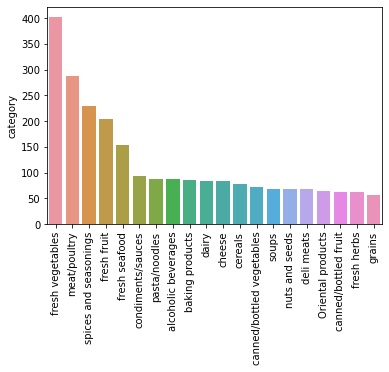

In [20]:
cat_num = df_ingredients['category'].value_counts()[:20]
chart = sns.barplot(x=cat_num.index, y=cat_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

<br>
<br>

### Let`s check the top 20 most used ingredient categories.

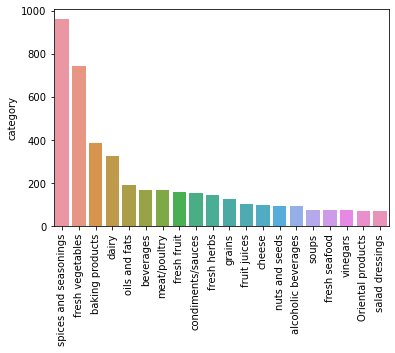

In [21]:
cat_num = df_recipe_recommender['category'].value_counts()[:20]
chart = sns.barplot(x=cat_num.index, y=cat_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

#### We can notice that by far the most used ingredients are 'spices and seasonigs' which should not count towards our end goal. This will be helpful for our goal.
<br>
<br>

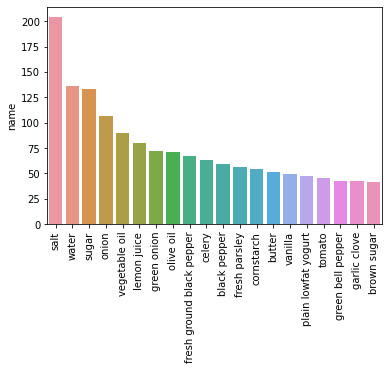

In [22]:
cat_num = df_recipe_recommender['name'].value_counts()[:20]
chart = sns.barplot(x=cat_num.index, y=cat_num)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

<br>
<br>

### Play with the data and check if we can find more correlations between variables.

#### Check if it any correlation between the total preparation time and the length of the 'directions' column. Suppose that if the recipe is more complicated and the instructions are larger, also the preparation time will be higher.
#### Create a new column in the 'df_recipe' table where we sum up all durations.

In [23]:
df_recipe_recommender['total_min'] = df_recipe_recommender['prep_min'] + df_recipe_recommender['cook_min'] + df_recipe_recommender['stnd_min']
#get direction length
df_recipe_recommender['dir_len'] = df_recipe_recommender['directions'].apply(lambda x: len(str(x)))

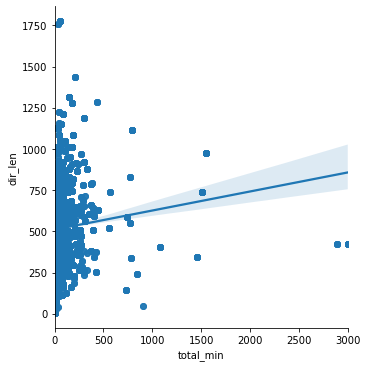

In [24]:
sns.lmplot(x="total_min", y="dir_len", data=df_recipe_recommender, palette="Set1")

#### We have a few outliers which may influence the output. Remove the outliers.

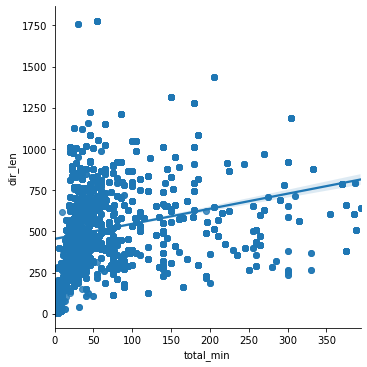

In [25]:
df_recipe_helper = df_recipe_recommender[df_recipe_recommender['total_min'] < 400]
sns.lmplot(x="total_min", y="dir_len", data=df_recipe_helper, palette="Set1")

<br>

#### Try another correlation visualization

<AxesSubplot:>

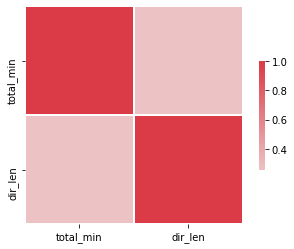

In [26]:
cmap = sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(df_recipe_helper[['total_min', 'dir_len']].corr(), vmax=1, center=0, cmap=cmap,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### We can notice that the duration of a recipe it is not correlated with the length of the instructions.